In [12]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
import features

In [27]:
train = pd.read_csv('all.csv')

In [28]:
print(train.shape)

(573, 5)


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author     573 non-null    object
 1   content    573 non-null    object
 2   poem_name  571 non-null    object
 3   age        573 non-null    object
 4   type       573 non-null    object
dtypes: object(5)
memory usage: 22.5+ KB


In [30]:
train.dropna(inplace=True)

EDA

In [31]:
train.head()

,author,content,poem_name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


In [8]:
train.describe()

,author,content,poem name,age,type
count,571,571,571,571,571
unique,67,505,508,2,3
top,WILLIAM SHAKESPEARE,"Originally published in Poetry, March 1914.",Canto IV,Renaissance,Love
freq,71,4,3,315,326


In [13]:
temp = train.groupby('author').count()['poem_name'].reset_index().sort_values(by='poem_name',ascending=False)
temp.style.background_gradient(cmap='Purples')

,author,poem name
66,WILLIAM SHAKESPEARE,71
53,SIR PHILIP SIDNEY,42
28,JOHN DONNE,41
10,EDMUND SPENSER,34
64,WILLIAM BUTLER YEATS,26
54,SIR THOMAS WYATT,22
13,EZRA POUND,16
2,CARL SANDBURG,16
59,THOMAS CAMPION,15
63,WALLACE STEVENS,14


<Axes: xlabel='count', ylabel='author'>

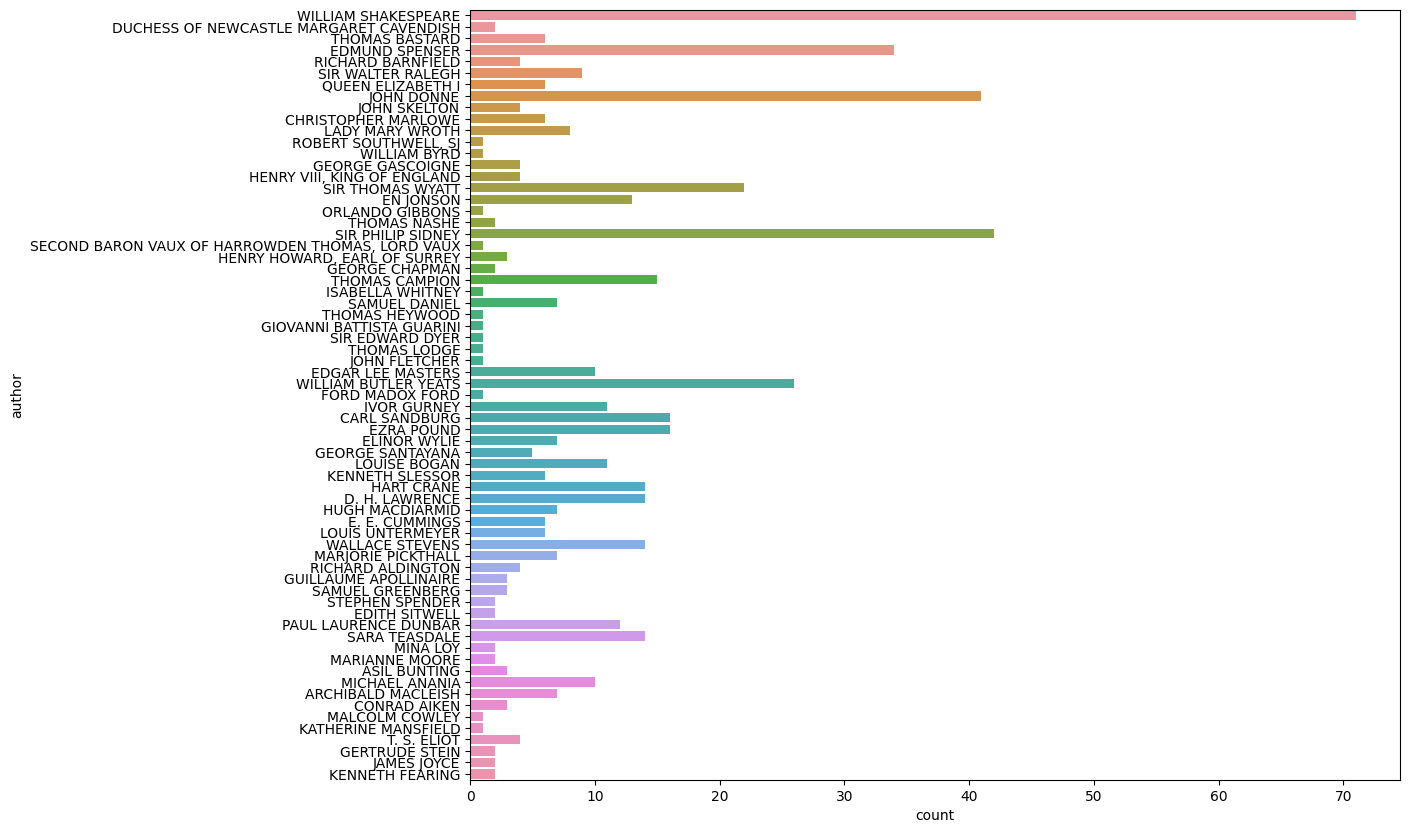

In [20]:
plt.figure(figsize=(12,10))
sns.countplot(y='author',data=train)

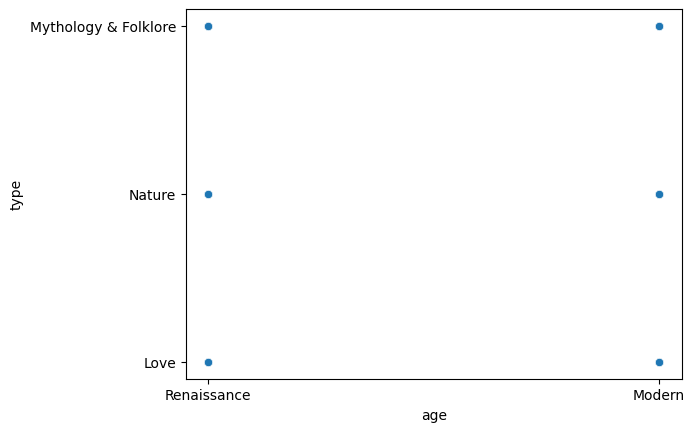

In [22]:
sns.scatterplot(data = train, x = "age", y = "type")
plt.show()

Plotting no of words before v/s after cleaning

/var/folders/fr/qb6wn34n69sbqgs4dj98knkr0000gn/T/ipykernel_33332/4061035269.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(temp['after'], shade=True, color="r").set_title('Kernel Distribution of Number Of words before and after removing stopwords')
/var/folders/fr/qb6wn34n69sbqgs4dj98knkr0000gn/T/ipykernel_33332/4061035269.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  p1=sns.kdeplot(temp['before'], shade=True, color="b")


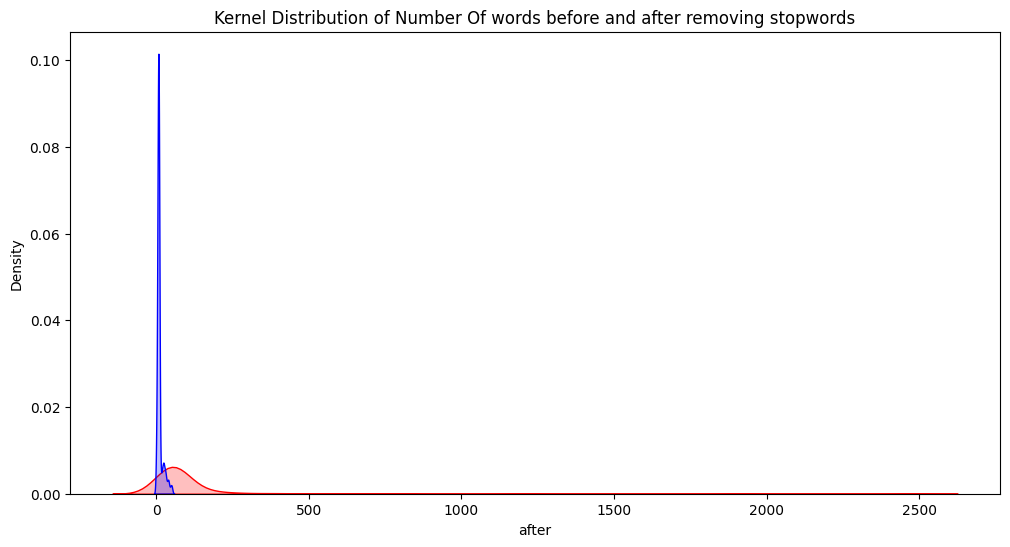

In [38]:
temp = pd.DataFrame(columns=['content', 'after','before'])
temp['comment'] = train['content']
temp['after'] = train['content'].apply(lambda x:len(features.tokenize(features.remove_stop_words(features.convert_case(features.clean_text(x))))[0]))
temp['before'] = train['content'].apply(lambda x:len(features.tokenize(features.convert_case(features.clean_text(x)))[0]))

plt.figure(figsize=(12,6))
p1=sns.kdeplot(temp['after'], shade=True, color="r").set_title('Kernel Distribution of Number Of words before and after removing stopwords')
p1=sns.kdeplot(temp['before'], shade=True, color="b")